## This notebook is for generating PheTK results.

Documentation and tutorials here:
https://github.com/nhgritctran/PheTK/blob/main/README.md

In [ ]:
## Install PheTK
!pip install phetk --upgrade
!pip show PheTK | grep Version

# Restart the notebook kernel before proceeding to the next step.

## PheTK with live data

In [13]:
## Import modules
from phetk.phecode import Phecode
from phetk.phewas import PheWAS
from phetk.plot import Plot

In [5]:
## PHECODE MODULE

# Instantiate class Phecode and provide basic info
phecode = Phecode(platform="aou")

# Generate phecode profiles/counts for ALL AoU participants
phecode.count_phecode(
        phecode_version="X",
        output_file_path="gs://fc-secure-7ae80de6-52d1-43da-b022-1de783982d19/data/phewas_counts.csv")

Start querying ICD codes...
Done!

Mapping ICD codes to phecodeX...
Successfully generated phecodeX counts for cohort participants!

Saved to gs://fc-secure-7ae80de6-52d1-43da-b022-1de783982d19/data/phewas_counts.csv



### ADHD PheWAS
This PheWAS analysis identifies phecodes associated with ADHD diagnosis.
Cohort file used: ADHD_SUD_phewas_df.csv

n ADHD = 9,809
n Controls = 39,236

ADHD and control cohorts were age- and sex-matched.
Sex at birth was the only covariate considered.

This PheWAS identified 1,079 phecodes that met the Bonferonni correction threshold.

In [12]:
## PHEWAS MODULE

# Instantiate class PheWAS and provide parameters for analysis
# Store results as phewas_results1.csv
phewas = PheWAS(
    phecode_version="X",
    phecode_count_file_path="gs://fc-secure-7ae80de6-52d1-43da-b022-1de783982d19/data/phewas_counts.csv",
    cohort_file_path="gs://fc-secure-7ae80de6-52d1-43da-b022-1de783982d19/data/ADHD_SUD_phewas_df.csv",
    sex_at_birth_col="sex_binary",          #EDIT HERE
    male_as_one=False,
    covariate_cols=[                        #EDIT HERE
        "sex_binary"
    ],
    independent_variable_of_interest="group_binary", #EDIT HERE
    min_cases=50,
    min_phecode_count=2,
    method="logit",
    output_file_path="gs://fc-secure-7ae80de6-52d1-43da-b022-1de783982d19/data/phewas_results1.csv"
)

~~~~~~~~~~~~~~~~~~~~~~~~    Creating PheWAS Instance    ~~~~~~~~~~~~~~~~~~~~~~~~

Cohort size:  49045
group_binary descriptions:  shape: (2, 2)
┌──────────────┬───────┐
│ group_binary ┆ count │
│ ---          ┆ ---   │
│ i64          ┆ u32   │
╞══════════════╪═══════╡
│ 0            ┆ 39236 │
│ 1            ┆ 9809  │
└──────────────┴───────┘

Number of unique phecodes in cohort:  3357
Total number of phecode events:  3098820
Number of phecode batches to process:  3357

Analysis method:  Logistic regression



In [13]:
# Run PheWAS
phewas.run()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    Running PheWAS    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Parallelization method: multithreading
Number of workers: 11

Creating ThreadPoolExecutor...
Submitting jobs to workers...
Submitted 3357 jobs. Running regressions...


Processed: 100%|██████████| 3357/3357 [06:43<00:00,  8.33it/s]


Multithreading completed successfully.
Combining 1751 result files...


Reading files: 100%|██████████| 1751/1751 [00:02<00:00, 712.17it/s]


Concatenating results...
Cleaning up temporary files...


Cleaning files: 100%|██████████| 1751/1751 [00:00<00:00, 41351.00it/s]



~~~~~~~~~~~~~~~~~~~~~~~~~~~~    PheWAS Completed    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Number of participants in cohort: 49045
Number of phecodes in cohort: 3357
Number of phecodes having less than 50 cases or controls: 1606
Number of phecodes tested: 1751
Suggested Bonferroni correction (-log₁₀ scale): 4.544316141747427
Number of phecodes above Bonferroni correction: 1079

PheWAS results saved to gs://fc-secure-7ae80de6-52d1-43da-b022-1de783982d19/data/phewas_results1.csv.tsv 



### PheWAS results: Individuals with ADHD vs non-ADHD Controls

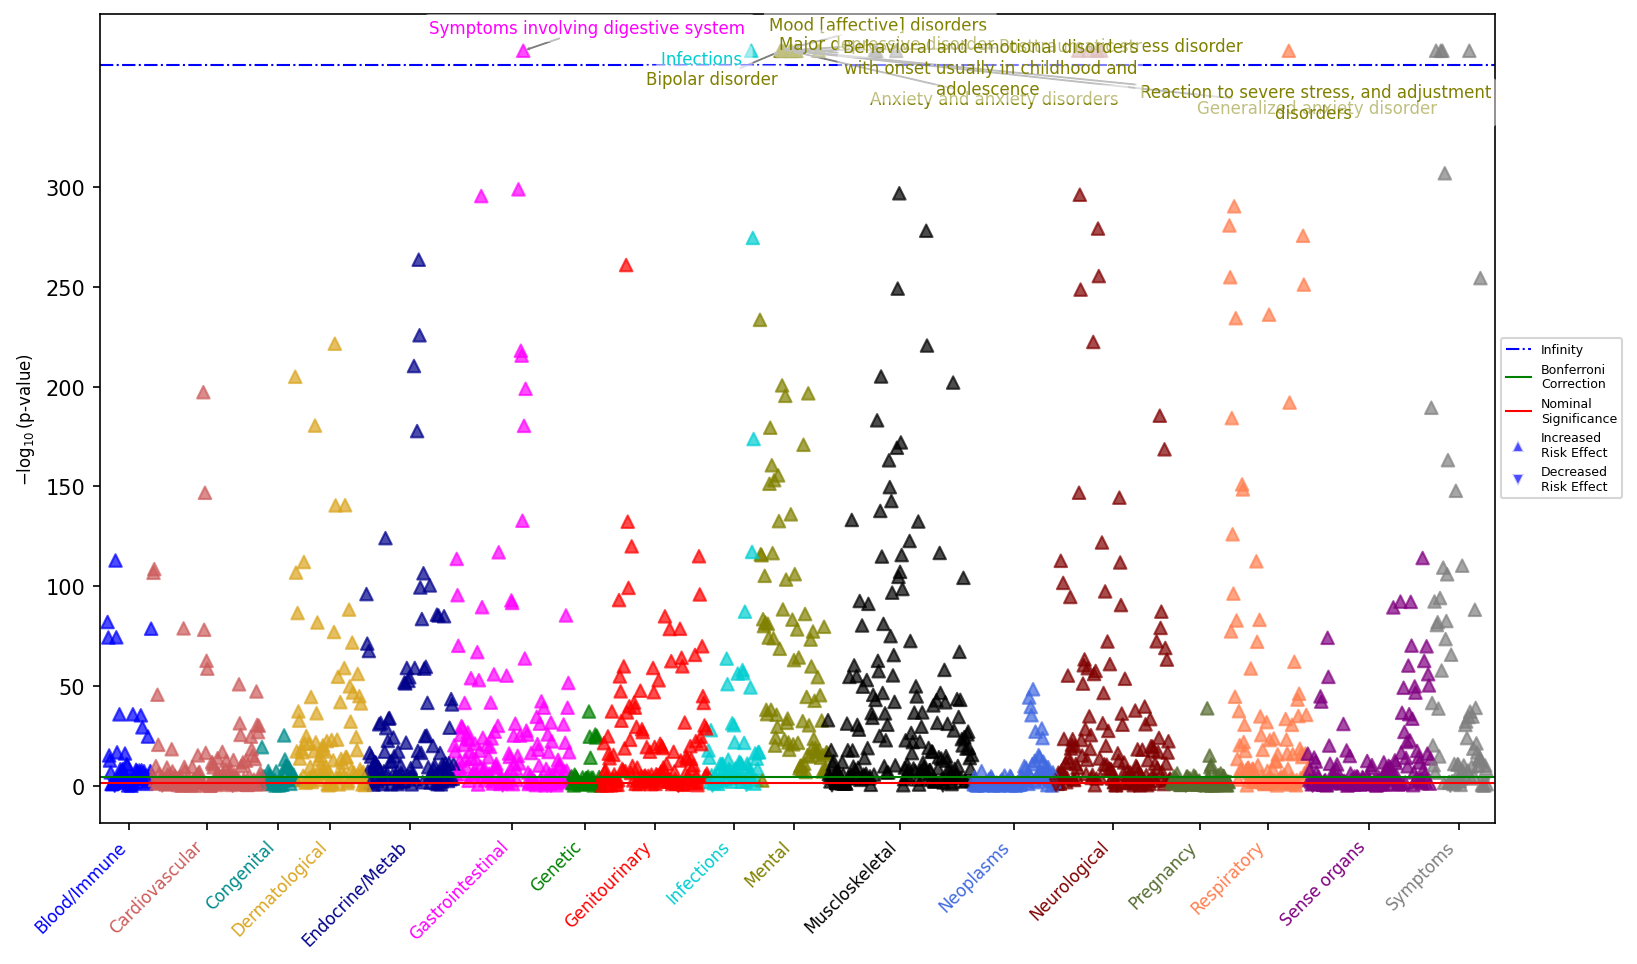

In [19]:
## PLOT MODULE

# Instantiate class Plot with PheWAS results as input
p = Plot("gs://fc-secure-7ae80de6-52d1-43da-b022-1de783982d19/data/phewas_results1.csv.tsv")

# Generate Manhattan plot
p.manhattan(
    label_values="p_value",
    label_count=10,
    save_plot=False
)

Note that this PheWAS identified **more than 1,000 phenotypes associated with ADHD diagnosis**.
This is way too many hits to visualize in a Manhattan plot.

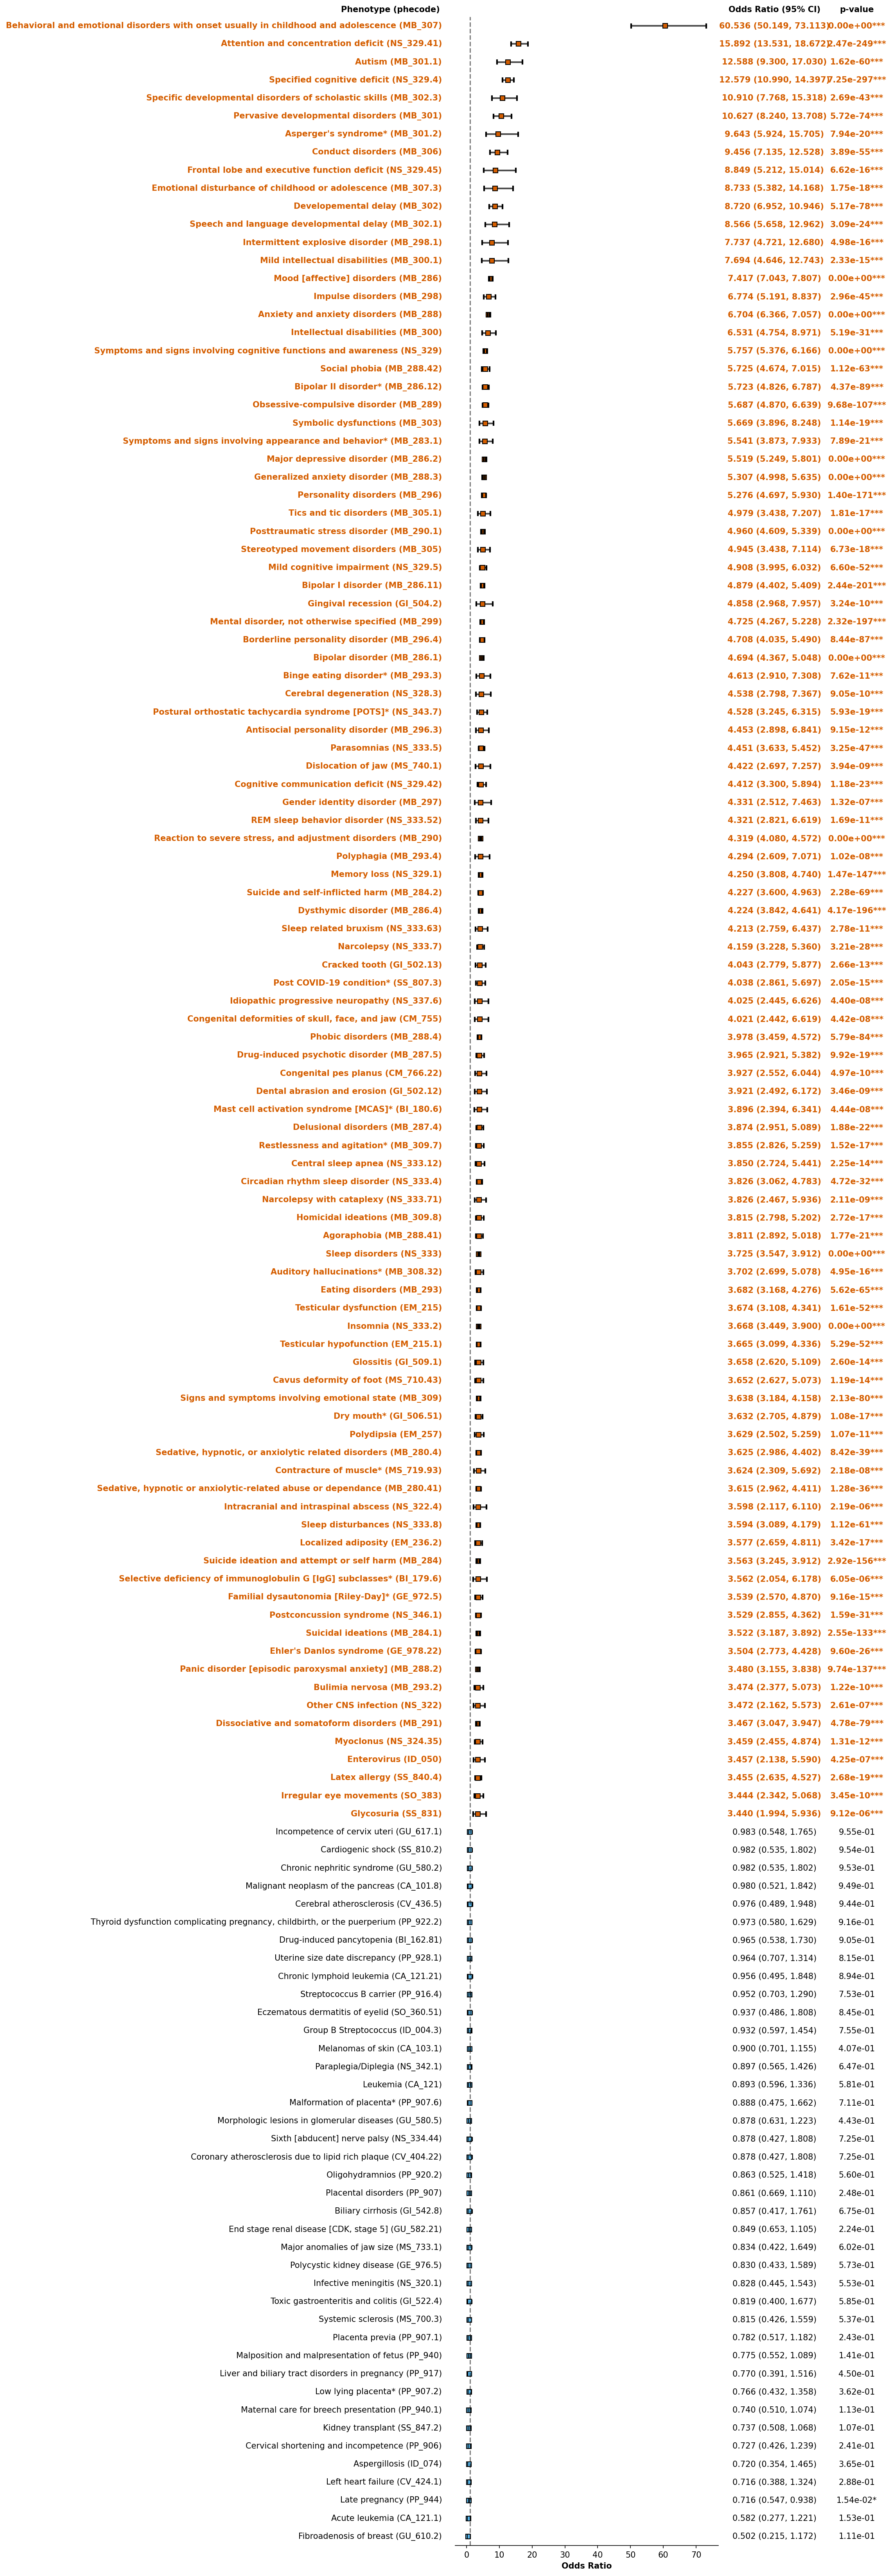

In [25]:
# Generate forest plot - top 100 hits

p.forest(highlight_significance=True, show_p_value_asterisks=True, save_plot=False,
        n_top_values=100)

Note that the only substance use disorder diagnosis that made the top 100 was **sedative/hypnotic/anxiolytic dependence**.

### SUD-positive cohort with ADHD as variable of interest
Cohort file: SUD_phewas_df.csv

    n SUD with ADHD = 3233
    n SUD without ADHD = 7424
    
Covariates: 
    sex at birth
    birth year

In [10]:
## PHEWAS MODULE

# Instantiate class PheWAS and provide parameters for analysis
# Store results as phewas_results2.csv
phewas = PheWAS(
    phecode_version="X",
    phecode_count_file_path="gs://fc-secure-7ae80de6-52d1-43da-b022-1de783982d19/data/phewas_counts.csv",
    cohort_file_path="gs://fc-secure-7ae80de6-52d1-43da-b022-1de783982d19/data/SUD_phewas_df.csv",
    sex_at_birth_col="sex_binary",          #EDIT HERE
    male_as_one=False,
    covariate_cols=["sex_binary","birth_year"],
    independent_variable_of_interest="group_binary", #EDIT HERE
    min_cases=50,
    min_phecode_count=2,
    method="logit",
    output_file_path="gs://fc-secure-7ae80de6-52d1-43da-b022-1de783982d19/data/phewas_results2"
)

~~~~~~~~~~~~~~~~~~~~~~~~    Creating PheWAS Instance    ~~~~~~~~~~~~~~~~~~~~~~~~

Cohort size:  10657
group_binary descriptions:  shape: (2, 2)
┌──────────────┬───────┐
│ group_binary ┆ count │
│ ---          ┆ ---   │
│ i64          ┆ u32   │
╞══════════════╪═══════╡
│ 1            ┆ 3233  │
│ 0            ┆ 7424  │
└──────────────┴───────┘

Number of unique phecodes in cohort:  3154
Total number of phecode events:  1084564
Number of phecode batches to process:  3154

Analysis method:  Logistic regression



In [11]:
# Run PheWAS
phewas.run()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    Running PheWAS    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Parallelization method: multithreading
Number of workers: 3

Creating ThreadPoolExecutor...
Submitting jobs to workers...
Submitted 3154 jobs. Running regressions...


Processed: 100%|██████████| 3154/3154 [02:53<00:00, 18.22it/s]


Multithreading completed successfully.
Combining 1260 result files...


Reading files: 100%|██████████| 1260/1260 [00:01<00:00, 778.88it/s]


Concatenating results...
Cleaning up temporary files...


Cleaning files: 100%|██████████| 1260/1260 [00:00<00:00, 40653.11it/s]



~~~~~~~~~~~~~~~~~~~~~~~~~~~~    PheWAS Completed    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Number of participants in cohort: 10657
Number of phecodes in cohort: 3154
Number of phecodes having less than 50 cases or controls: 1894
Number of phecodes tested: 1260
Suggested Bonferroni correction (-log₁₀ scale): 4.401400540781544
Number of phecodes above Bonferroni correction: 482

PheWAS results saved to gs://fc-secure-7ae80de6-52d1-43da-b022-1de783982d19/data/phewas_results2.tsv 



### PheWAS results: SUD-positive cohort, ADHD vs non-ADHD individuals


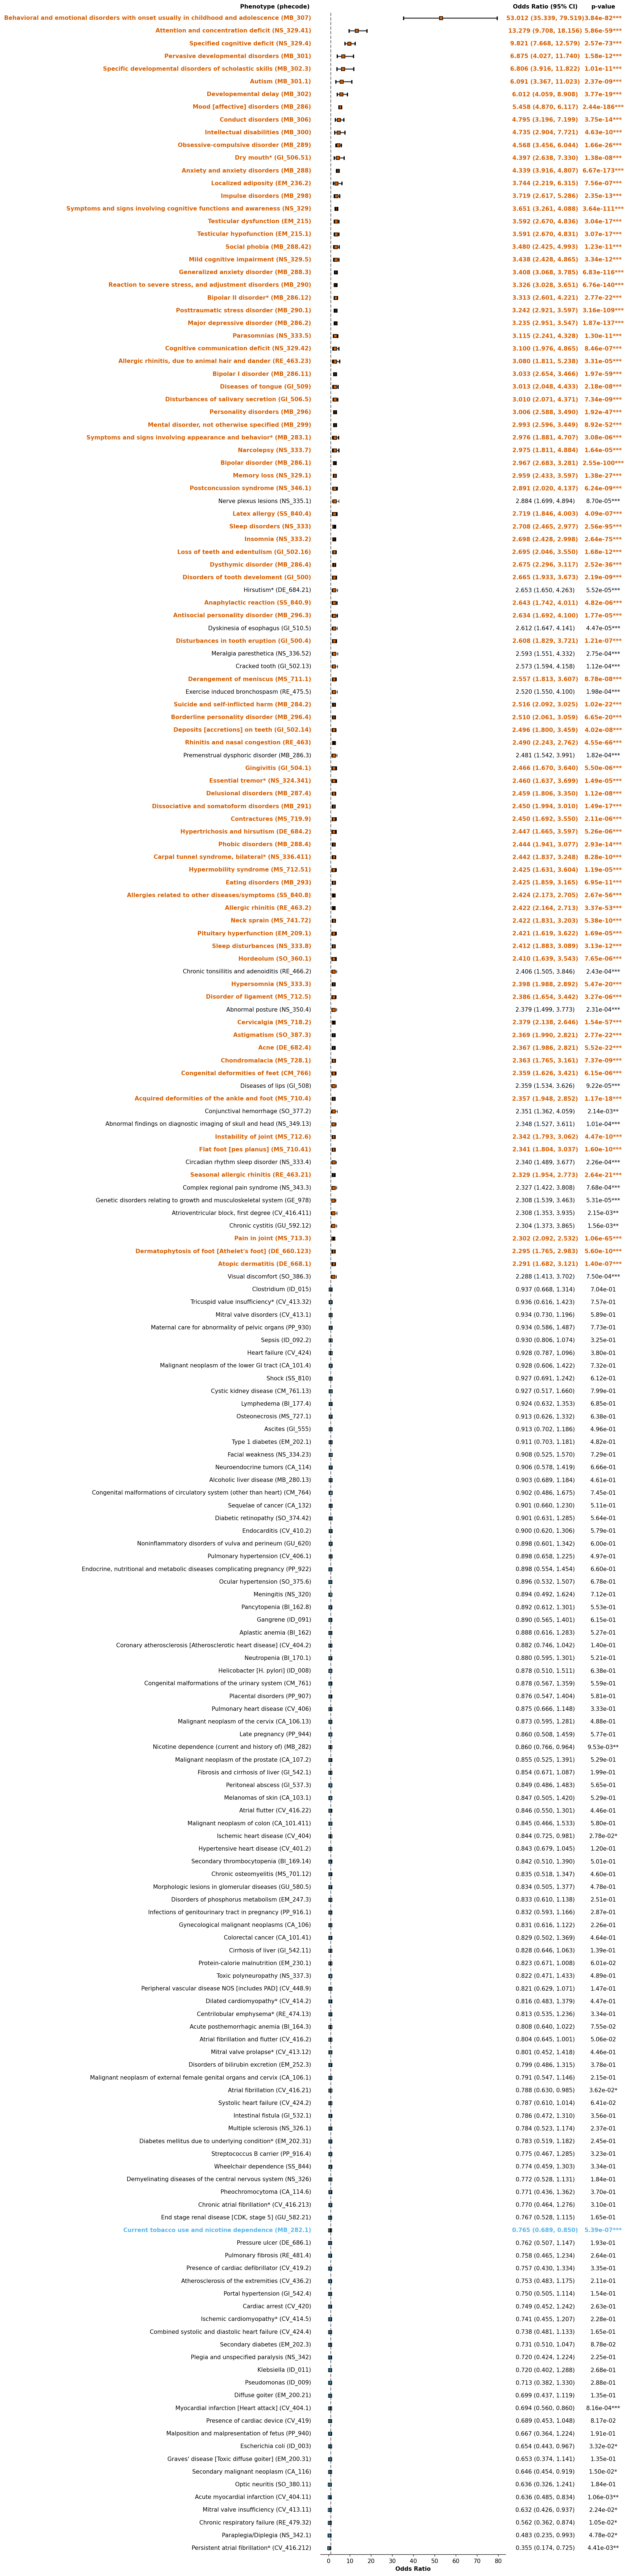

In [17]:
# Instantiate class Plot with PheWAS results as input
p2 = Plot("gs://fc-secure-7ae80de6-52d1-43da-b022-1de783982d19/data/phewas_results2.tsv")

# Generate forest plot - top 100 hits

p2.forest(highlight_significance=True, show_p_value_asterisks=True, save_plot=False, n_top_values=100)

Meaningful differences are observed in the top 100 association hits for individuals with ADHD in a cohort enriched for substance use disorder compared to the top 100 for all individuals without regard for SUD presence.

First-glance observations:
* Diseases of tongue?
* Sleep disorders
* Deposits on teeth
* Gingivitis
* Loss of teeth (!)
* Derangement of meniscus, neck sprain, cervicalgia, joint pain, etc.

Dental issues and chronic pain conditions seem appear in the top 100 association hits with greater frequency, though odds ratio should be compared to odds ratios from the general population ADHD PheWAS.